<a href="https://colab.research.google.com/github/chendydeaandriany/Data-Cleaning-Pima-Indian-Diabetes/blob/main/Pima_Indian_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

> The data used in this analysis is a dataset to predict whether a female patient has diabetes based on certain diagnostic measurements contained in the dataset. The dataset has 9 attributes composed of 768 instances, where the Outcome attribute is the target variable, with the following description.

*   Pregnancies : gestational age
*   Glucose : lasma glucose concentration was determined during a 2-hour oral   glucose tolerance test.
*   BP : blood pressure during diastole (mmHg)
*   ST : the thickness of the triceps skin folds (mm)
*   Insulin : 2 hour serum insulin (mu U/ml)
*   BMI : body Mass Index (kg/m^2)
*   DPF : hereditary functions of diabetes
*   Age : age (years)
*   Outcome : variable classes (1 : Positive, 2 : Negative)









# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

# Import Dataset

In [ ]:
sheet_url = 'https://drive.google.com/file/d/1Eu6vPfEKoBwCXGAnxhbkssAmYYluRrdO/view?usp=sharing'
sheet_url = 'https://drive.google.com/uc?id=' + sheet_url.split('/')[-2]
df = pd.read_csv(sheet_url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Cleaning & Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The outcome attribute is defined as an integer, and it is false. Based on the description, the outcome attribute is categorical data with 1 as positive and 2 as negative.

In [ ]:
# Convert the outcome to categorical data
df['Outcome']=pd.Categorical(df.Outcome)

In [ ]:
#Data type of outcome already detect as categorical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Based on the results, descriptive analysis showed that the glucose, BP, ST, insulin, and BMI variables have a minimum value of 0. This is something that does not make sense, so for subsequent analysis observations with data zero, it will be considered as a missing value. For the pregnancy variable, a value of 0 may occur because the patient is not pregnant, but for a maximum value of 17, it does not make sense, since there is no possibility of a pregnancy for 17 months.

<Figure size 720x480 with 0 Axes>

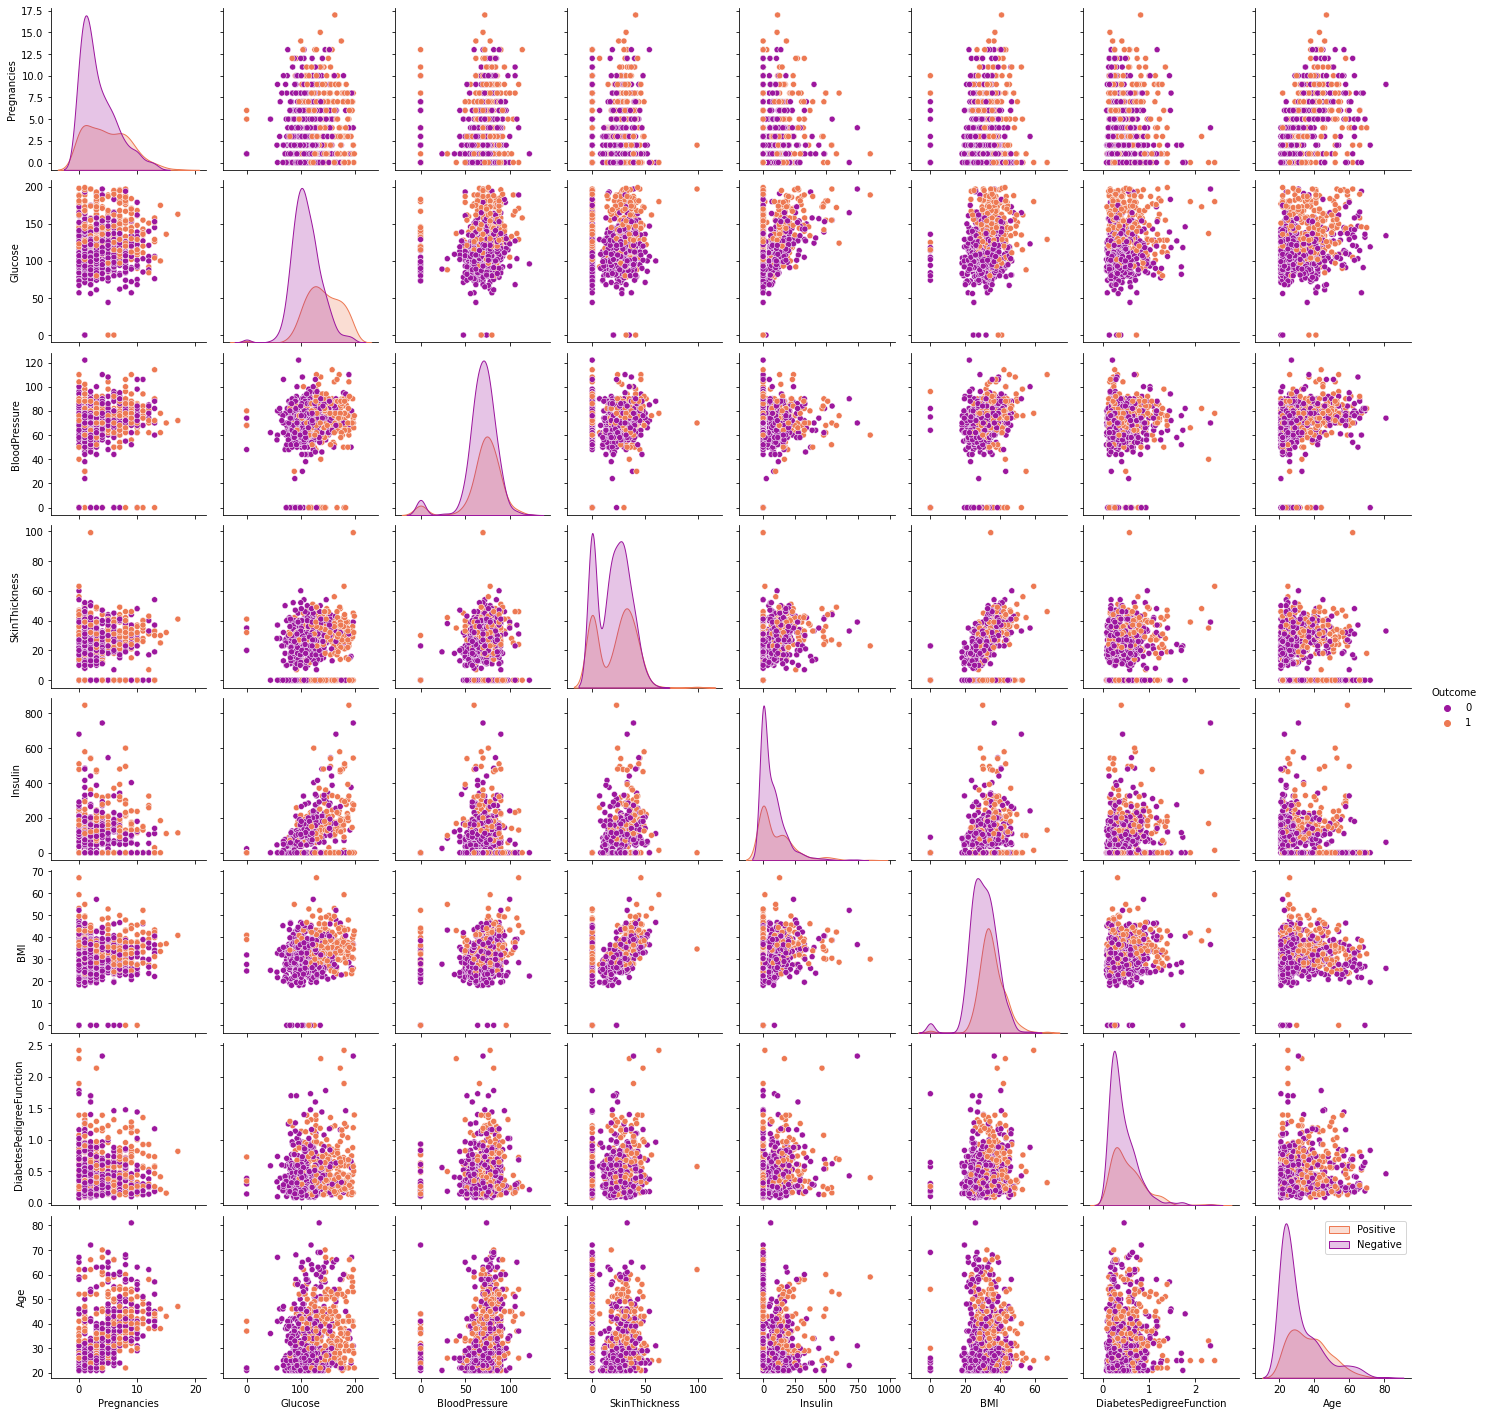

In [ ]:
# To see the distribution, here is a visualization of the dataset based on each class.
plt.figure(dpi=120)
sns.pairplot(df, hue='Outcome', palette ='plasma')
plt.legend(['Positive', 'Negative'])
plt.show()

It can be seen from the characteristics of each class and attribute that the data points cannot be separated linearly according to their class, so it can be considered that the data is not linearly dispersed based on its class. Some are seen to have a skew distribution due to the presence of an outlier.

In [ ]:
# Glucose, BP, ST, Insulin, and BMI variables have a minimum value of 0, which makes no sense to occur so that the data can be considered a missing value.
df.loc[df['Glucose']==0.0, 'Glucose']=np.NAN
df.loc[df['BloodPressure']==0.0, 'BloodPressure']=np.NAN
df.loc[df['SkinThickness']==0.0, 'SkinThickness']=np.NAN
df.loc[df['Insulin']==0.0, 'Insulin']=np.NAN
df.loc[df['BMI']==0.0, 'BMI']=np.NAN

In [ ]:
total_missing_value = df.isnull().sum()[1:6]
percentage_missing_value= (round(total_missing_value/len(df)*100,2))
check_missing_val = pd.DataFrame({'total_missing_value': total_missing_value,'percentage_missing_value':percentage_missing_value})
check_missing_val

,total_missing_value,percentage_missing_value
Glucose,5,0.65
BloodPressure,35,4.56
SkinThickness,227,29.56
Insulin,374,48.70
BMI,11,1.43


To overcome the missing value in this dataset, an imputation is carried out using regression. Because the data of each class is not linearly distributed, the imputation of the data as a whole with regression can reduce bias in the estimate. Imputation regression is one of the methods for estimating missing values by regression using other variables as parameters. Here is a summary of the statistics after imputations on all five variables:

In [ ]:
missing_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [ ]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [ ]:
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

In [ ]:
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = df[feature + "_imp"]
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})
    
    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])
    
    deter_data.loc[df[feature].isnull(), "Det" + feature] = model.predict(df[parameters])[df[feature].isnull()]

In [ ]:
df=df.drop(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'],axis=1)


In [ ]:
df.describe()

,Pregnancies,DiabetesPedigreeFunction,Age,Glucose_imp,BloodPressure_imp,SkinThickness_imp,Insulin_imp,BMI_imp
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.471876,33.240885,121.680990,72.489583,29.322917,157.563802,32.471224
std,3.369578,0.331329,11.760232,30.487581,12.380428,10.289798,121.324432,6.935264
min,0.000000,0.078000,21.000000,44.000000,24.000000,7.000000,14.000000,18.200000
25%,1.000000,0.243750,24.000000,99.000000,64.000000,22.000000,76.000000,27.475000
50%,3.000000,0.372500,29.000000,117.000000,72.000000,29.000000,126.000000,32.300000
75%,6.000000,0.626250,41.000000,141.000000,80.000000,36.000000,191.250000,36.725000
max,17.000000,2.420000,81.000000,199.000000,122.000000,99.000000,846.000000,67.100000


The missing value has been resolved. However, the minimum and maximum values in the data still have unreasonable values for the range of variables, so it is necessary to identify and overcome outliers in the data.

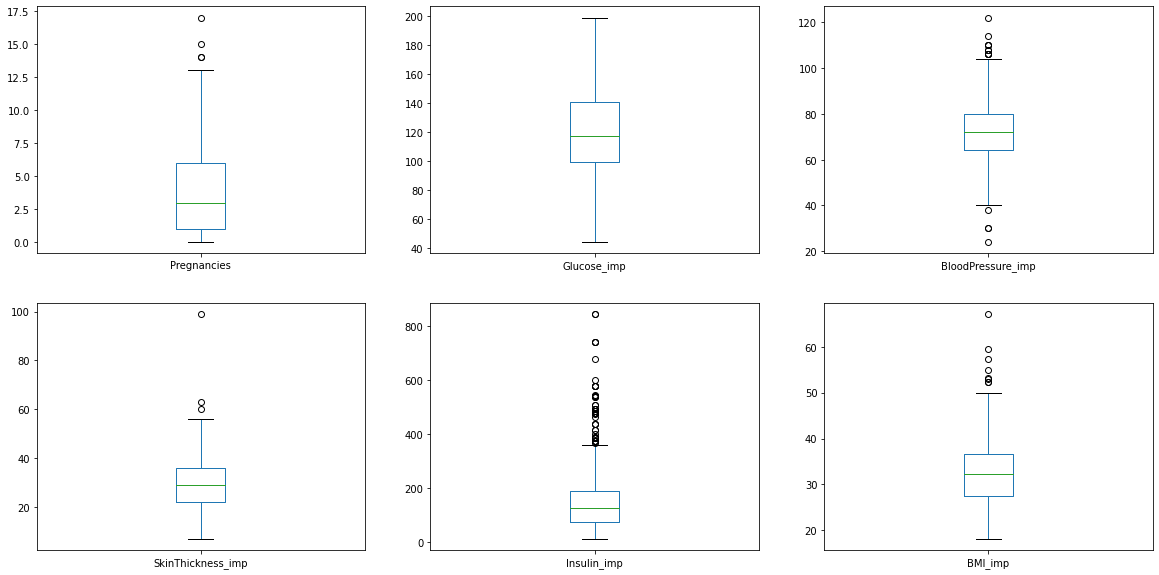

In [ ]:
numerical_column=['Pregnancies','Glucose_imp','BloodPressure_imp','SkinThickness_imp','Insulin_imp','BMI_imp']

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = df.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3-Q1
 lower_range = Q1-(1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [ ]:
lower,upper=outlier_treatment(df['Pregnancies'])
df[(df['Pregnancies']<lower)|(df['Pregnancies']>upper)]

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose_imp,BloodPressure_imp,SkinThickness_imp,Insulin_imp,BMI_imp
88,15,0.153,43,1,136.0,70.0,32.0,110.0,37.1
159,17,0.817,47,1,163.0,72.0,41.0,114.0,40.9
298,14,0.412,46,1,100.0,78.0,25.0,184.0,36.6
455,14,0.212,38,1,175.0,62.0,30.0,310.0,33.6


In [ ]:
Pregnancies_med=df.Pregnancies.median()
df['Pregnancies'] = np.where((df['Pregnancies']<lower)|(df['Pregnancies']>upper),	Pregnancies_med, df['Pregnancies'])

In [ ]:
lower,upper=outlier_treatment(df['Glucose_imp'])
df[(df['Glucose_imp']<lower)|(df['Glucose_imp']>upper)]

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose_imp,BloodPressure_imp,SkinThickness_imp,Insulin_imp,BMI_imp


In [ ]:
lower,upper=outlier_treatment(df['BloodPressure_imp'])
df[(df['BloodPressure_imp']<lower)|(df['BloodPressure_imp']>upper)]

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose_imp,BloodPressure_imp,SkinThickness_imp,Insulin_imp,BMI_imp
18,1.0,0.183,33,0,103.0,30.0,38.0,83.0,43.3
43,9.0,0.721,54,1,171.0,110.0,24.0,240.0,45.4
84,5.0,0.227,37,1,137.0,108.0,18.0,63.0,48.8
106,1.0,0.207,27,0,96.0,122.0,36.0,152.0,22.4
125,1.0,0.496,26,1,88.0,30.0,42.0,99.0,55.0
177,0.0,0.319,26,1,129.0,110.0,46.0,130.0,67.1
362,5.0,0.305,65,0,103.0,108.0,37.0,94.0,39.2
549,4.0,0.680,37,0,189.0,110.0,31.0,228.0,28.5
597,1.0,0.559,21,0,89.0,24.0,19.0,25.0,27.8
599,1.0,0.407,26,0,109.0,38.0,18.0,120.0,23.1


In [ ]:
BloodPressure_imp_med=df.BloodPressure_imp.median()
df['BloodPressure_imp'] = np.where((df['BloodPressure_imp']<lower)|(df['BloodPressure_imp']>upper), BloodPressure_imp_med, df['BloodPressure_imp'])

In [ ]:
lower,upper=outlier_treatment(df['SkinThickness_imp'])
df[(df['SkinThickness_imp']<lower)|(df['SkinThickness_imp']>upper)]

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose_imp,BloodPressure_imp,SkinThickness_imp,Insulin_imp,BMI_imp
57,0.0,0.962,31,0,100.0,88.0,60.0,110.0,46.8
445,0.0,2.420,25,1,180.0,78.0,63.0,14.0,59.4
579,2.0,0.575,62,1,197.0,70.0,99.0,375.0,34.7


In [ ]:
SkinThickness_imp_med=df.SkinThickness_imp.median()
df['SkinThickness_imp'] = np.where((df['SkinThickness_imp']<lower)|(df['SkinThickness_imp']>upper), SkinThickness_imp_med, df['SkinThickness_imp'])

In [ ]:
lower,upper=outlier_treatment(df['Insulin_imp'])
df[(df['Insulin_imp']<lower)|(df['Insulin_imp']>upper)]

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose_imp,BloodPressure_imp,SkinThickness_imp,Insulin_imp,BMI_imp
0,6.0,0.627,50,1,148.0,72.0,35.0,543.0,33.6
8,2.0,0.158,53,1,197.0,70.0,45.0,543.0,30.5
11,10.0,0.537,34,1,168.0,74.0,36.0,375.0,38.0
13,1.0,0.398,59,1,189.0,60.0,23.0,846.0,30.1
17,7.0,0.254,31,1,107.0,74.0,54.0,510.0,29.6
61,8.0,0.270,39,1,133.0,72.0,15.0,375.0,32.9
74,1.0,0.396,22,0,79.0,75.0,30.0,579.0,32.0
83,0.0,0.237,22,0,101.0,65.0,28.0,579.0,24.6
104,2.0,0.930,27,0,85.0,65.0,49.0,392.0,39.6
111,8.0,0.543,46,1,155.0,62.0,26.0,495.0,34.0


In [ ]:
Insulin_imp_med=df.Insulin_imp.median()
df['Insulin_imp'] = np.where((df['Insulin_imp']<lower)|(df['Insulin_imp']>upper),	Insulin_imp_med, df['Insulin_imp'])

In [ ]:
lower,upper=outlier_treatment(df['BMI_imp'])
df[(df['BMI_imp']<lower)|(df['BMI_imp']>upper)]

,Pregnancies,DiabetesPedigreeFunction,Age,Outcome,Glucose_imp,BloodPressure_imp,SkinThickness_imp,Insulin_imp,BMI_imp
120,0.0,0.759,25,1,162.0,76.0,56.0,100.0,53.2
125,1.0,0.496,26,1,88.0,72.0,42.0,99.0,55.0
177,0.0,0.319,26,1,129.0,72.0,46.0,130.0,67.1
193,11.0,0.578,40,1,135.0,70.0,19.0,88.0,52.3
247,0.0,0.427,23,0,165.0,90.0,33.0,3.0,52.3
303,5.0,0.209,28,1,115.0,98.0,19.0,130.0,52.9
445,0.0,2.420,25,1,180.0,78.0,3.0,14.0,59.4
673,3.0,0.880,22,0,123.0,100.0,35.0,240.0,57.3


In [ ]:
BMI_imp_med=df.BMI_imp.median()
df['BMI_imp'] = np.where((df['BMI_imp']<lower)|(df['BMI_imp']>upper),	BMI_imp_med, df['BMI_imp'])

In [ ]:
df.describe()

,Pregnancies,DiabetesPedigreeFunction,Age,Glucose_imp,BloodPressure_imp,SkinThickness_imp,Insulin_imp,BMI_imp
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.782552,0.471876,33.240885,121.680990,72.166667,29.787760,107.312500,32.222396
std,3.270644,0.331329,11.760232,30.487581,11.124791,8.373174,23.284617,6.475513
min,0.000000,0.078000,21.000000,44.000000,40.000000,14.000000,14.000000,18.200000
25%,1.000000,0.243750,24.000000,99.000000,64.000000,23.000000,115.000000,27.475000
50%,3.000000,0.372500,29.000000,117.000000,72.000000,29.000000,115.000000,32.300000
75%,6.000000,0.626250,41.000000,141.000000,80.000000,35.000000,115.000000,36.500000
max,13.000000,2.420000,81.000000,199.000000,104.000000,50.000000,115.000000,50.000000


In [ ]:
outliers=df[['Pregnancies','Glucose_imp','BloodPressure_imp','SkinThickness_imp','Insulin_imp','BMI_imp','DiabetesPedigreeFunction','Age']]

In [ ]:
n_data=len(list(outliers.columns.values))

In [ ]:
def mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [ ]:
outliers['mahala'] = mahalanobis(x=outliers, data=outliers)
outliers.head()

,Pregnancies,Glucose_imp,BloodPressure_imp,SkinThickness_imp,Insulin_imp,BMI_imp,DiabetesPedigreeFunction,Age,mahala
0,6.0,148.0,72.0,35.0,115.0,33.6,0.627,50,7.376983
1,1.0,85.0,66.0,29.0,44.0,26.6,0.351,31,11.138103
2,8.0,183.0,64.0,33.0,115.0,23.3,0.672,32,14.001940
3,1.0,89.0,66.0,23.0,115.0,28.1,0.167,21,3.237303
4,0.0,137.0,40.0,35.0,115.0,43.1,2.288,33,85.378173


In [ ]:
from scipy.stats import chi2
def MD_detectOutliers(MD,n_data):
    nilaichi=chi2.isf(0.01, n_data)
    outliers = []
    for i in range(len(MD)):
        if (MD[i] > nilaichi):
            outliers.append(i) 
    return np.array(outliers)

In [ ]:
outliers_indices = MD_detectOutliers(outliers['mahala'],n_data)

print("Outliers Indices: {}\n".format(outliers_indices))

Outliers Indices: [  4   8  12  45  58  62  72 102 185 228 294 323 370 371 387 408 445 453
 456 459 464 537 593 596 601 621 622 684]



In [ ]:
len(outliers_indices)

28

<Figure size 720x480 with 0 Axes>

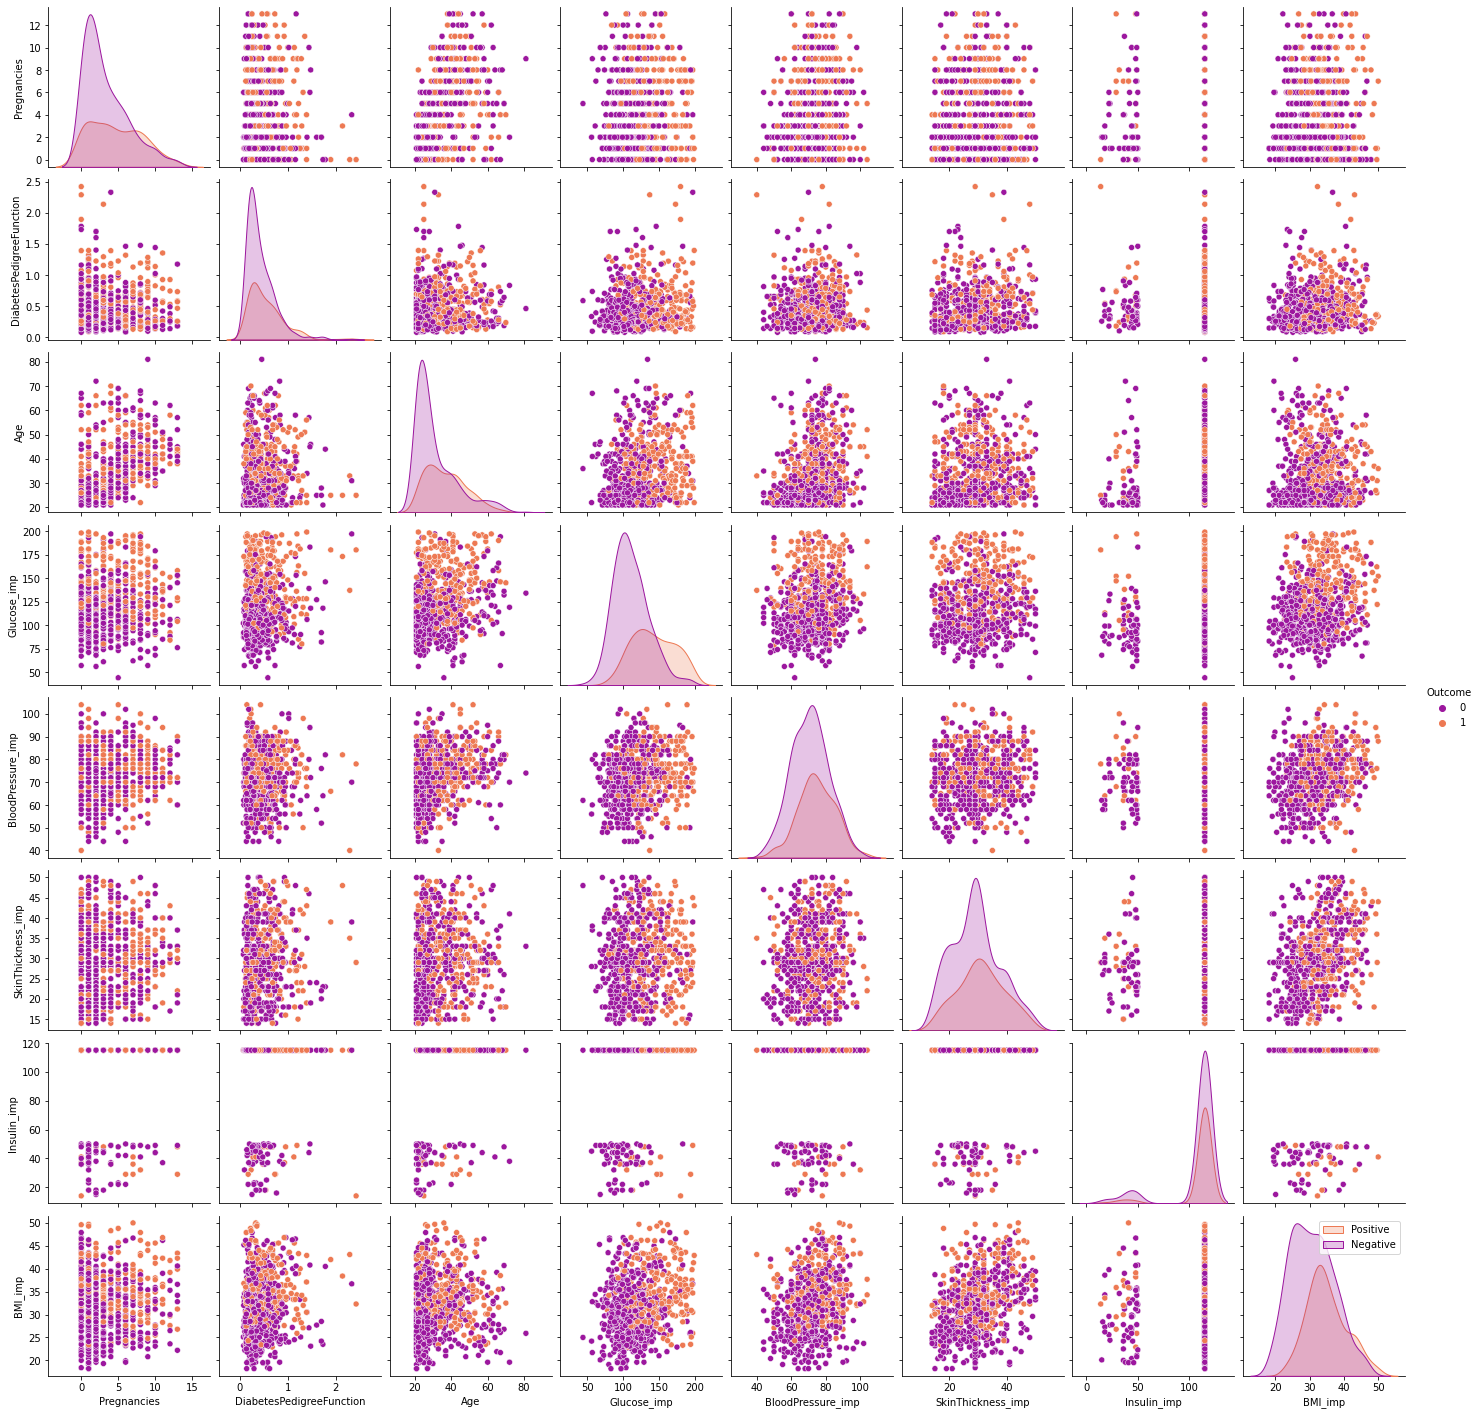

In [ ]:
plt.figure(dpi=120)
sns.pairplot(df, hue='Outcome', palette ='plasma')
plt.legend(['Positive', 'Negative'])
plt.show()

In [ ]:
df.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Pregnancies                  10.697114
DiabetesPedigreeFunction      0.109779
Age                         138.303046
Glucose_imp                 929.492624
BloodPressure_imp           123.760973
SkinThickness_imp            70.110046
Insulin_imp                 542.173403
BMI_imp                      41.932275
dtype: float64